In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Z = 2X**2-3Y**2+1+e

In [2]:
x = np.arange(-1,1, step=0.01)
y = np.arange(-1,1, step=0.01)

In [3]:
len(x), len(y)

(200, 200)

In [4]:
X,Y=np.meshgrid(x,y)

In [5]:
X.shape, Y.shape

((200, 200), (200, 200))

In [6]:
c=np.ones((200,200))

In [7]:
e = np.random.rand(200,200)*0.1

In [8]:
Z = 2*X*X - 3*Y*Y + 5*e

In [9]:
Z.shape

(200, 200)

In [10]:
import vis

Using TensorFlow backend.


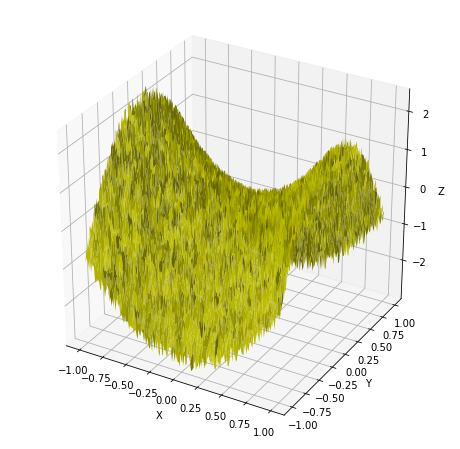

In [11]:
vis.plot3d(X,Y,Z)

In [12]:
X.shape, Y.shape, Z.shape

((200, 200), (200, 200), (200, 200))

In [13]:
input_xy= np.c_[X.reshape(-1),Y.reshape(-1)]
output_z=Z.reshape(-1)

In [14]:
input_xy.shape, output_z.shape

((40000, 2), (40000,))

# Model

In [15]:
from keras.models import Sequential
from keras.layers import Dense

In [16]:
model= Sequential()

In [19]:
model.add(Dense(40,input_dim = 2, activation= 'relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20, activation='relu'))

model.add(Dense(1))

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
_________________________________________________________________
dense_5 (Dense)              (None, 40)                80        
_________________________________________________________________
dense_6 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_7 (Dense)              (None, 20)                420       
__________

In [29]:
model.compile(loss = 'mean_squared_error', optimizer='sgd')

In [30]:
output = model.fit(input_xy, output_z, epochs=10, validation_split=0.1)

Train on 36000 samples, validate on 4000 samples
Epoch 1/10
36000/36000 [==============================] - 2s 47us/step - loss: 0.0220 - val_loss: 0.1276
Epoch 2/10
36000/36000 [==============================] - 1s 40us/step - loss: 0.0219 - val_loss: 0.1320
Epoch 3/10
36000/36000 [==============================] - 1s 39us/step - loss: 0.0219 - val_loss: 0.1355
Epoch 4/10
36000/36000 [==============================] - 1s 40us/step - loss: 0.0219 - val_loss: 0.1153
Epoch 5/10
36000/36000 [==============================] - 1s 40us/step - loss: 0.0219 - val_loss: 0.1227
Epoch 6/10
36000/36000 [==============================] - 1s 40us/step - loss: 0.0219 - val_loss: 0.1260
Epoch 7/10
36000/36000 [==============================] - 1s 39us/step - loss: 0.0219 - val_loss: 0.1376
Epoch 8/10
36000/36000 [==============================] - 1s 39us/step - loss: 0.0219 - val_loss: 0.1245
Epoch 9/10
36000/36000 [==============================] - 1s 40us/step - loss: 0.0219 - val_loss: 0.1166
Epoch 

# Predict

In [31]:
z_pred = model.predict(input_xy).reshape((200,200))

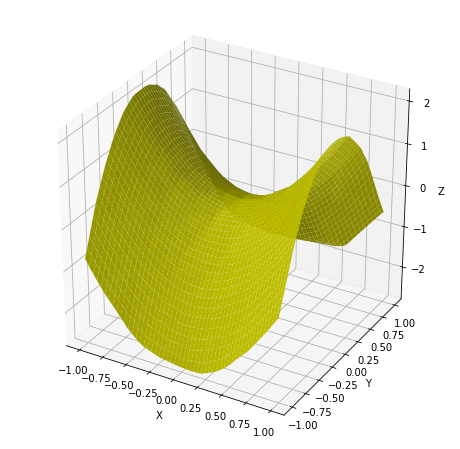

In [32]:
vis.plot3d(X,Y,z_pred)